Step 1:
set up yolo

In [ ]:
!pip install ultralytics
import torch
import ultralytics
from ultralytics import YOLO
print(torch.cuda.is_available())  # Should return True if GPU connected
import cv2
import matplotlib.pyplot as plt
import glob
import kagglehub
import cv2
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
False


step 2: download dataset ppe from kaggle


In [ ]:



path = kagglehub.dataset_download("shlokraval/ppe-dataset-yolov8")

print("Path to dataset files:", path)

100%|██████████| 2.35G/2.35G [00:23<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shlokraval/ppe-dataset-yolov8/versions/1


In [ ]:


train_imgs = glob.glob(path + '/train/images/*.jpg')
valid_imgs = glob.glob(path + '/valid/images/*.jpg')
print('Sample train image:', train_imgs[0])
print('Sample valid image:', valid_imgs[0])


Sample train image: /root/.cache/kagglehub/datasets/shlokraval/ppe-dataset-yolov8/versions/1/train/images/IMG_3093_mp4-21_jpg.rf.c702a37dd387ce9c4a29fcc7ddd99057.jpg
Sample valid image: /root/.cache/kagglehub/datasets/shlokraval/ppe-dataset-yolov8/versions/1/valid/images/MX_img_42_jpg.rf.20cdfc5cfb4b15f10faa60f92cfaf019.jpg


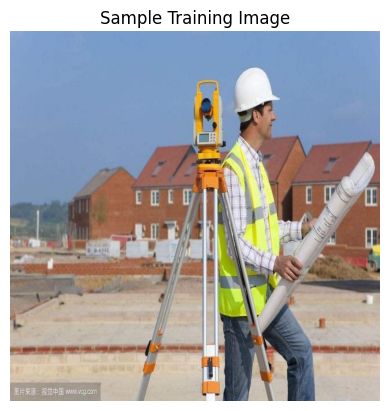

In [ ]:


sample_img_path = train_imgs[12]  # Or pick any from the printed list
img = cv2.imread(sample_img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Sample Training Image')
plt.axis('off')
plt.show()


In [ ]:
with open(path + '/data.yaml', 'r') as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 14
names: ['Fall-Detected', 'Gloves', 'Goggles', 'Hardhat', 'Ladder', 'Mask', 'NO-Gloves', 'NO-Goggles', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest']

roboflow:
  workspace: roboflow-universe-projects
  project: personal-protective-equipment-combined-model
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-universe-projects/personal-protective-equipment-combined-model/dataset/4


In [ ]:
model = YOLO('yolov8n.pt')
results = model.train(
    data=path + '/data.yaml',
    epochs=10,
    imgsz=640,
    batch=8,
    name='ppe_yolov8n_v1'
)

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/shlokraval/ppe-dataset-yolov8/versions/1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ppe_yolov8n_v1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

KeyboardInterrupt: 